# Challenge 11
http://www.pythonchallenge.com/pc/return/5808.html

Use huge/file if prompted for credentials at this point.  See solution for Challenge 8.

Page title: "odd/even"

## Solution 
http://www.pythonchallenge.com/pc/return/evil.html

In [217]:
import matplotlib.pyplot as plt
import numpy as np

In [202]:
img = plt.imread('cave.jpg')

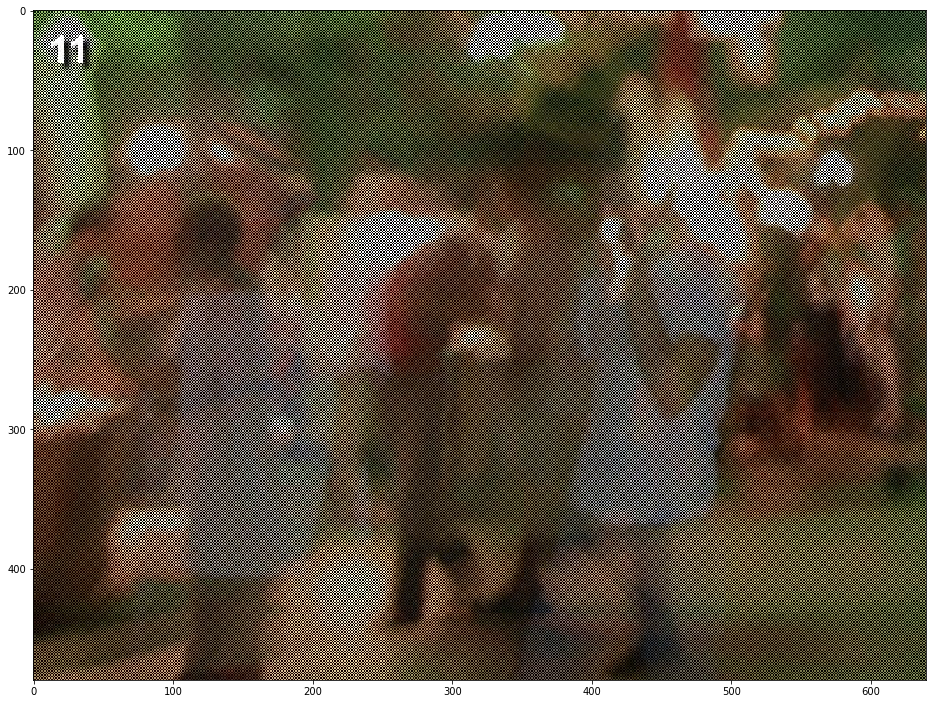

In [203]:
plt.figure(figsize=(16,14))
plt.imshow(img)

In [ ]:
#Maybe there are two images, overlayed?

In [207]:
img_even = np.zeros_like(img)

In [208]:
img_odd = img_even.copy()

In [209]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if (i+j)%2 ==0: #for "even" index
            img_even[i][j]=img[i][j]  #grab pixel @ original location
        else:
            img_odd[i][j]=img[i][j]   #grab pixel @ original location         

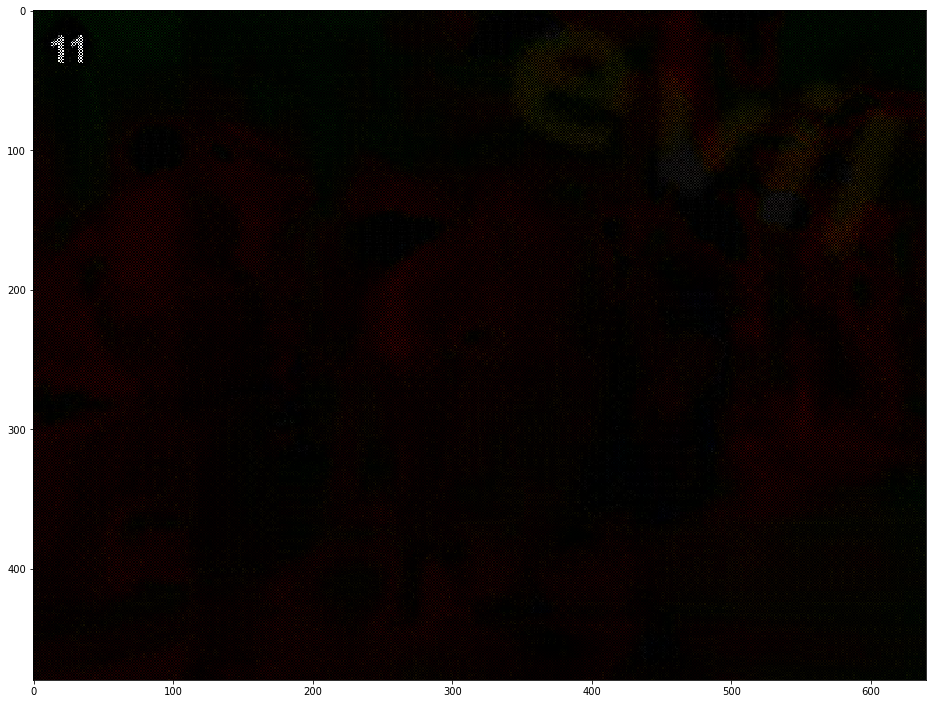

In [212]:
plt.figure(figsize=(16,14))
plt.imshow(img_even)

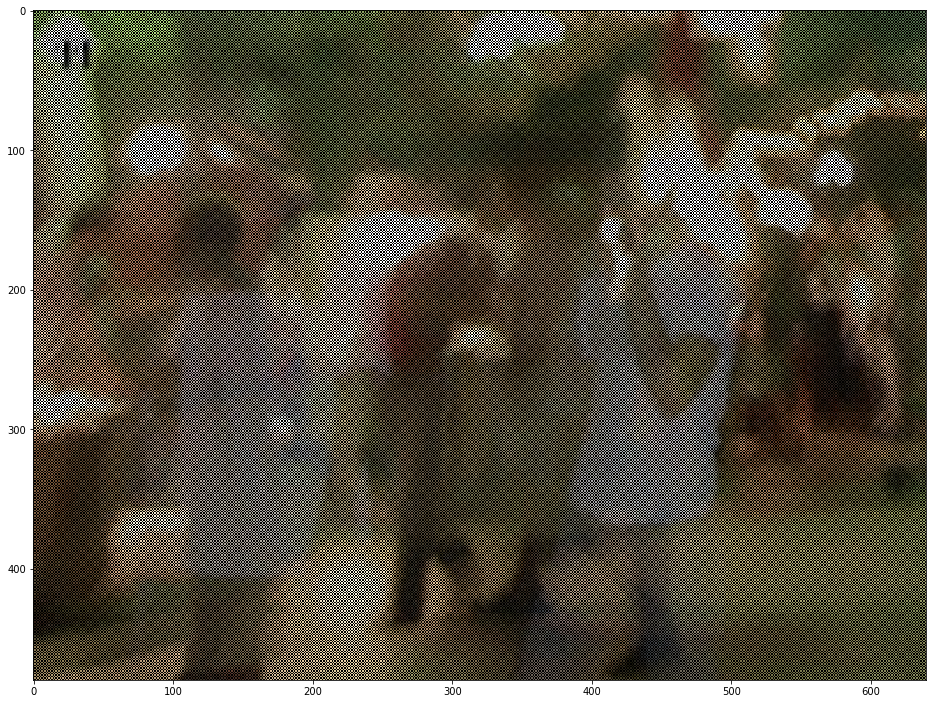

In [213]:
plt.figure(figsize=(16,14))
plt.imshow(img_odd)

In [216]:
url = 'http://www.pythonchallenge.com/pc/return/5808.html'
url.replace('5808', 'evil')

'http://www.pythonchallenge.com/pc/return/evil.html'

# Challenge 12
http://www.pythonchallenge.com/pc/return/evil.html

"dealing evil"

## Solution
http://www.pythonchallenge.com/pc/return/disproportional.html

In [218]:
img = plt.imread('aDK7UfYm') #Wierd filename?

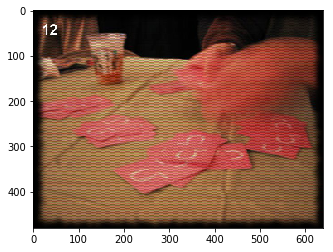

In [219]:
plt.imshow(img)

In [220]:
#Try the same approach as before
img_even = np.zeros_like(img)
img_odd = img_even.copy()

In [221]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if (i+j)%2 ==0: #for "even" index
            img_even[i][j]=img[i][j]  #grab pixel @ original location
        else:
            img_odd[i][j]=img[i][j]   #grab pixel @ original location      

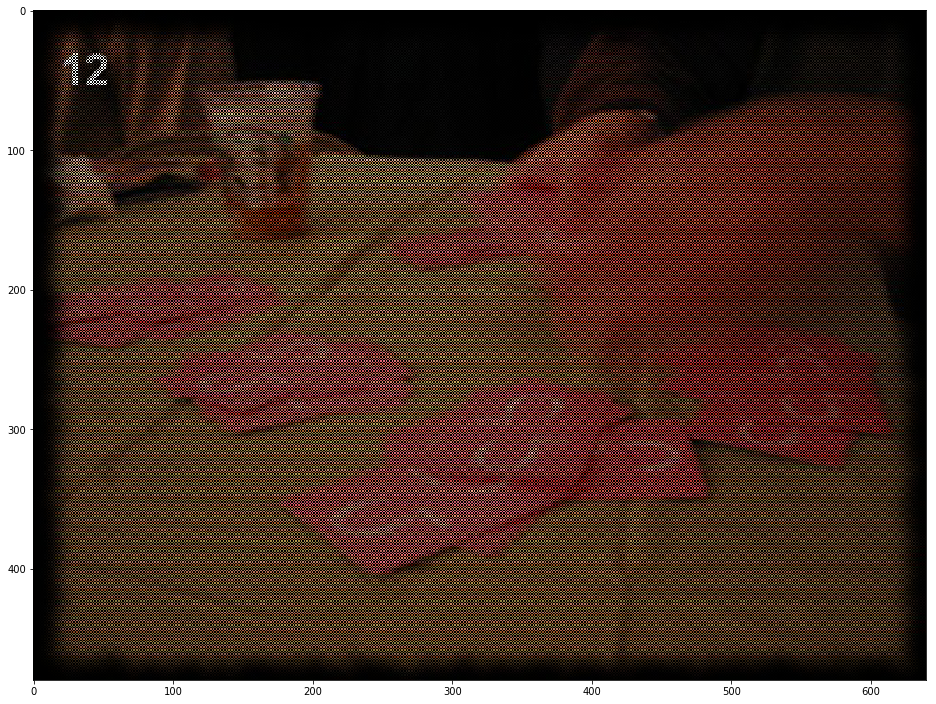

In [225]:
plt.figure(figsize=(16,14))
plt.imshow(img_even)

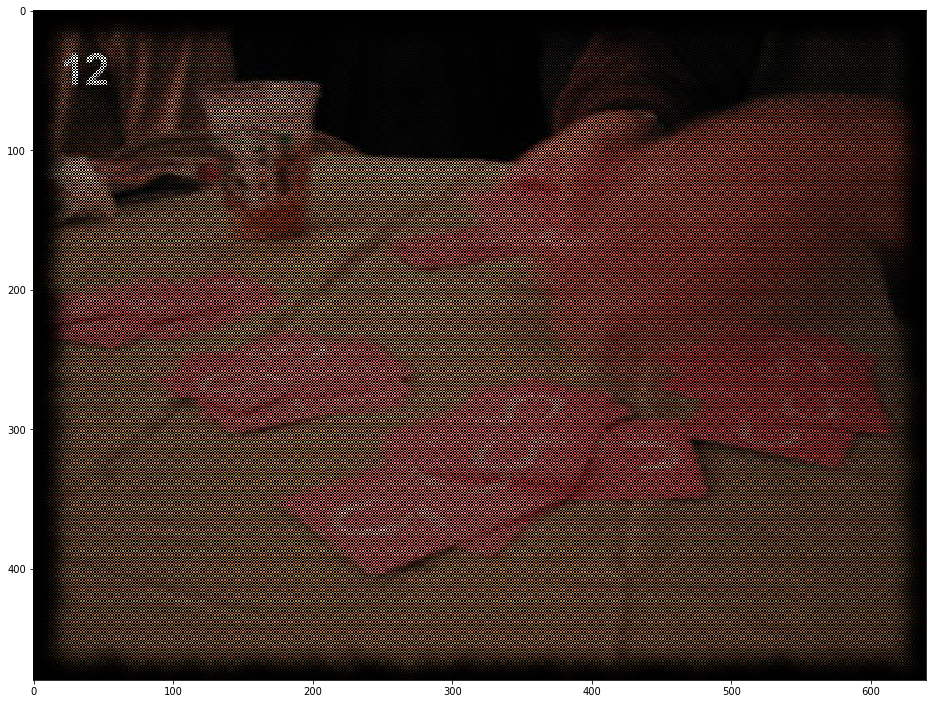

In [226]:
plt.figure(figsize=(16,14))
plt.imshow(img_odd)

In [241]:
#Nothing.  Though saving the image yields a wierd filename, the page source name is evil1.jpg.  Is there another?
url = "http://www.pythonchallenge.com/pc/return/evil.html"
url.replace("evil", 'evil2').replace("html", 'jpg')

'http://www.pythonchallenge.com/pc/return/evil2.jpg'

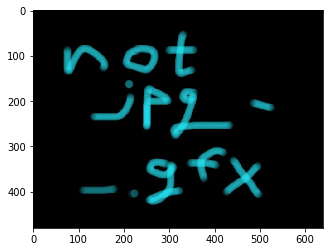

In [256]:
#Following URL leads to this image
evil2 = plt.imread('evil2.jpg')
plt.imshow(evil2)

Visiting
http://www.pythonchallenge.com/pc/return/evil2.gfx

we download evil2.gfx...Okay, I had to look this one up.  Some sort of file format used in animations.  So there may be several images in that file?  Hint: Looking at the cards, all are in stacks of 5, there are 5 stacks, all labeled 5.

In [257]:
evils = open("evil2.gfx", "rb").read() #open in read binary mode

In [264]:
len(evils)/5

13515.0

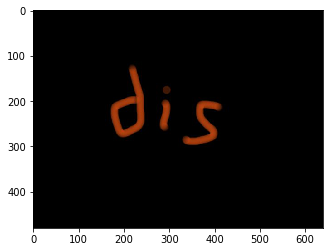

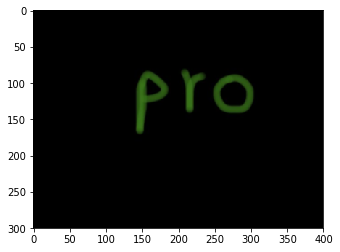

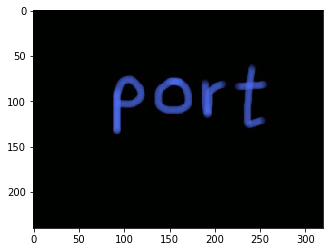

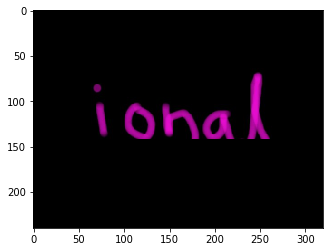

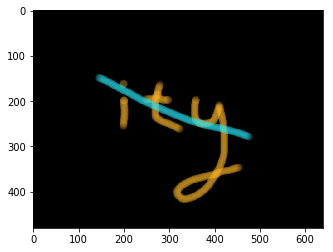

In [288]:
#Need this to prevent an error down the road
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


#Let's break up the data into 5 pieces, offset by 5
for i in range(5):
    open(f"evils{i}.jpg", 'wb').write(evils[i::5])
    plt.imshow(imread(f'evils{i}.jpg'))
    plt.show()

# Challenge 13
http://www.pythonchallenge.com/pc/return/disproportional.html

## Solution
http://www.pythonchallenge.com/pc/return/italy.html

The #5 key is linked to http://www.pythonchallenge.com/pc/phonebook.php

The page title says "call him" ... Who?

At least we can connect to the phonebook


In [289]:
import xmlrpc.client
phonebook = xmlrpc.client.ServerProxy("http://www.pythonchallenge.com/pc/phonebook.php")

In [290]:
phonebook

<ServerProxy for www.pythonchallenge.com/pc/phonebook.php>

In [291]:
phonebook.system.listMethods()

['phone',
 'system.listMethods',
 'system.methodHelp',
 'system.methodSignature',
 'system.multicall',
 'system.getCapabilities']

In [299]:
phonebook.system.getCapabilities()

{'xmlrpc': {'specUrl': 'http://www.xmlrpc.com/spec', 'specVersion': 1},
 'system.multicall': {'specUrl': 'http://www.xmlrpc.com/discuss/msgReader$1208',
  'specVersion': 1},
 'introspection': {'specUrl': 'http://phpxmlrpc.sourceforge.net/doc-2/ch10.html',
  'specVersion': 2}}

In [298]:
phonebook.system.methodHelp("phone")

'Returns the phone of a person'

In [297]:
phonebook.system.methodSignature("phone")

[['string', 'string']]

In [300]:
phonebook.phone("Name")

'He is not the evil'

In [304]:
phonebook.phone("evil")

'He is not the evil'

In [303]:
phonebook.phone("solution")

'He is not the evil'

In [305]:
#Alright.  Who do we need to call?  Let's go back to the previous challenge.  We stopped looking at evil1.jpg.

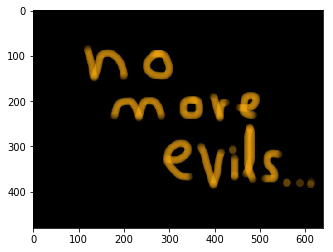

In [306]:
#http://www.pythonchallenge.com/pc/return/evil3.jpg gives us
plt.imshow(imread('evil3.jpg'))

http://www.pythonchallenge.com/pc/return/evil4.jpg gives us a page with a displayed error, that cannot be displayed becouse it contains an error...hmmm.

In [310]:
import requests
link = "http://www.pythonchallenge.com/pc/return/evil4.jpg"

f = requests.get(link)
print(f.text)

<?xml version="1.0" encoding="iso-8859-1"?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"
         "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
 <head>
  <title>401 - Unauthorized</title>
 </head>
 <body>
  <h1>401 - Unauthorized</h1>
 </body>
</html>



In [311]:
#Try the huge/file credential
f = requests.get(link, auth=('huge', 'file'))
print(f.text)

Bert is evil! go back!



In [312]:
#Bingo!  Let's call Bert now.
phonebook.phone("Bert")

'555-ITALY'

Italy? Italy!

http://www.pythonchallenge.com/pc/return/italy.html

# Challenge 14
http://www.pythonchallenge.com/pc/return/italy.html

## Solution
http://www.pythonchallenge.com/pc/return/cat.html

A spiral looking pastry and a barcode? Hint is "walk around". Page source has a really thin looking image file and this:

<!-- remember: 100*100 = (100+99+99+98) + (...  -->

In [313]:
img = plt.imread('index.png')

In [314]:
img.shape

(1, 10000, 3)

In page source we see <img src="wire.png" width="100" height="100">
so the thin image is artificially wrapped around to a square.  We can traverse it 100 to the right, then down 99, then left 99, then up 98, finally one more wrap around with 97 right, etc.  

At each "corner" grab the pixel and make a new image.

In [540]:
#Each turn will decrease image width of 100 by 2
#100, 99, 99, 98
#98, 97, 97, 96
#...
#2, 1, 1, 0
#There will be 50 rounds
a = [100, 99, 99, 98]
my_list = a
for k in range(0, 49, 1):
    
    b = [a[3], a[3]-1, a[3]-1, a[3]-(2)]
    a = b
    my_list += b
    
    

In [541]:
sum(my_list)

10000

In [591]:
x = np.zeros(100*100*3)
new_img = x.reshape(100,100,3)

In [595]:
%%time 
k=0
depth =0

while k < 10000:
    #traverse top, left -> right
    for j in range(my_list[0+4*depth]):
        new_img[depth][depth+j] = img[0][k]
        k += 1
    print(k)
    #traverse right, top -> down
    for j in range(my_list[1+4*depth]):
        new_img[depth + j-1][depth + my_list[0+4*depth]-1] = img[0][k]
        k+=1
    print(k)
    #traverse bottom, right -> left
    for j in range(my_list[2+4*depth]):
        new_img[depth + my_list[1+4*depth]-1][depth + my_list[0+4*depth]-1-j] = img[0][k]
        k+=1
    print(k)
    #traverse left, bottom -> up
    for j in range(my_list[3+4*depth]):
        new_img[depth+ my_list[1+4*depth]-j-1][depth] = img[0][k]
        k+=1
    print(k)
    #increase depth
    depth+=1
    print(depth)

100
199
298
396
1
494
591
688
784
2
880
975
1070
1164
3
1258
1351
1444
1536
4
1628
1719
1810
1900
5
1990
2079
2168
2256
6
2344
2431
2518
2604
7
2690
2775
2860
2944
8
3028
3111
3194
3276
9
3358
3439
3520
3600
10
3680
3759
3838
3916
11
3994
4071
4148
4224
12
4300
4375
4450
4524
13
4598
4671
4744
4816
14
4888
4959
5030
5100
15
5170
5239
5308
5376
16
5444
5511
5578
5644
17
5710
5775
5840
5904
18
5968
6031
6094
6156
19
6218
6279
6340
6400
20
6460
6519
6578
6636
21
6694
6751
6808
6864
22
6920
6975
7030
7084
23
7138
7191
7244
7296
24
7348
7399
7450
7500
25
7550
7599
7648
7696
26
7744
7791
7838
7884
27
7930
7975
8020
8064
28
8108
8151
8194
8236
29
8278
8319
8360
8400
30
8440
8479
8518
8556
31
8594
8631
8668
8704
32
8740
8775
8810
8844
33
8878
8911
8944
8976
34
9008
9039
9070
9100
35
9130
9159
9188
9216
36
9244
9271
9298
9324
37
9350
9375
9400
9424
38
9448
9471
9494
9516
39
9538
9559
9580
9600
40
9620
9639
9658
9676
41
9694
9711
9728
9744
42
9760
9775
9790
9804
43
9818
9831
9844
9856
44
9868
98

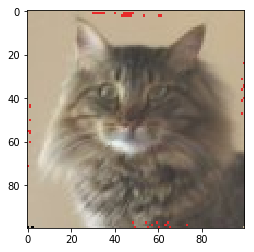

In [594]:
plt.imshow(new_img)

We have a winner!

# Challenge 15
http://www.pythonchallenge.com/pc/return/cat.html

## Solution
http://www.pythonchallenge.com/pc/return/uzi.html

In [ ]:
#This one was too easy.  We find out the cat's name is uzi, so new URL with cat->uzi is the answer.